In [381]:
import pandas as pd
import matplotlib.pyplot as plt 
import ipywidgets as widgets
from IPython.display import display 

In [382]:
cars_df = pd.read_csv('C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/cars/0.0.2/cars.csv')
oper1_df = pd.read_csv('C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/cars/0.0.2/operations.csv')
oper2_replace_df = pd.read_csv('C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/cars/0.0.2/operations.replace.csv')
kvit1_df = pd.read_csv('C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/cars/0.0.2/kvitantions.csv')
kvit2_replace_df = pd.read_csv('C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/cars/0.0.2/kvitantion2.csv')


In [383]:
merge_df = pd.merge(cars_df, kvit1_df, on='car_id')
merge_df = pd.merge(merge_df, oper1_df, on = 'operation_id', how ='left' )
merge_df

,car_id,brand,date_ex,operation_id,name,price
0,1,Mitsubishi,2023-12-01,1,Washing,1000
1,2,BMV,2023-12-02,2,Cleaning,2000
2,3,Toyota,2023-12-03,3,Brending,3000
3,4,Lada,2023-12-04,4,Stulishing,4000
4,5,Honda,2023-12-05,1,Washing,1000


In [384]:
total_without_replace = merge_df['price'].sum()
total_without_replace

11000

In [385]:
merge_with_replace_df = pd.merge(cars_df, kvit2_replace_df, on='car_id')
merge_with_replace_df = pd.merge(merge_with_replace_df, oper2_replace_df, on = 'operation_id', how ='left' )
merge_with_replace_df

,car_id,brand,date_ex,operation_id,num_detail,name,price,price_detail
0,1,Mitsubishi,2023-12-01,5,1,Replace detail,5000,1000
1,2,BMV,2023-12-02,6,2,Replace detail,5000,3000
2,3,Toyota,2023-12-03,7,3,Replace detail,5000,5000
3,4,Lada,2023-12-04,8,4,Replace detail,5000,7000
4,5,Honda,2023-12-05,9,5,Replace detail,5000,9000


In [386]:
total_with_replace = merge_with_replace_df['price'].sum()
total_with_replace

25000

In [387]:
merge_all_df = pd.concat([merge_with_replace_df, merge_df], ignore_index=True)
merge_all_df

,car_id,brand,date_ex,operation_id,num_detail,name,price,price_detail
0,1,Mitsubishi,2023-12-01,5,1.0,Replace detail,5000,1000.0
1,2,BMV,2023-12-02,6,2.0,Replace detail,5000,3000.0
2,3,Toyota,2023-12-03,7,3.0,Replace detail,5000,5000.0
3,4,Lada,2023-12-04,8,4.0,Replace detail,5000,7000.0
4,5,Honda,2023-12-05,9,5.0,Replace detail,5000,9000.0
5,1,Mitsubishi,2023-12-01,1,NaN,Washing,1000,NaN
6,2,BMV,2023-12-02,2,NaN,Cleaning,2000,NaN
7,3,Toyota,2023-12-03,3,NaN,Brending,3000,NaN
8,4,Lada,2023-12-04,4,NaN,Stulishing,4000,NaN
9,5,Honda,2023-12-05,1,NaN,Washing,1000,NaN


In [388]:
for_mark = merge_all_df.groupby('brand')['price'].sum().reset_index()
for_mark


,brand,price
0,BMV,7000
1,Honda,6000
2,Lada,9000
3,Mitsubishi,6000
4,Toyota,8000


<Figure size 640x480 with 0 Axes>

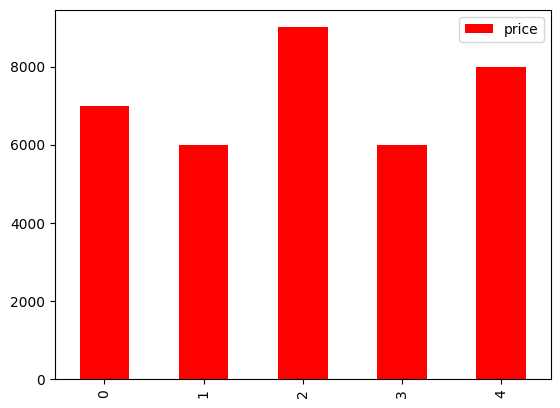

In [389]:
plt.figure()
for_mark.plot(kind='bar', color='red')
plt.title('')
plt.xlabel('')
plt.ylabel('')

plt.show()

In [390]:
all_mark = list(merge_all_df['brand'].unique())
mark_dropdown = widgets.Dropdown(options=all_mark, description='Choose')
display(mark_dropdown)

output = widgets.Output()

Dropdown(description='Choose', options=('Mitsubishi', 'BMV', 'Toyota', 'Lada', 'Honda'), value='Mitsubishi')

In [391]:
def count_car(choosed):
    with output:
        output.clear_output(wait=True) 
        choosed = mark_dropdown.value
        result_df = merge_all_df[merge_all_df['brand'] == choosed].groupby(['brand', 'name']).agg(count=('name', 'count')).reset_index()
        display(result_df)

# result_df = merge_all_df.groupby(['brand', 'name']).agg(count=('name', 'count')).reset_index()
# result_df

In [392]:
widgets.interactive(count_car, choosed=mark_dropdown)
output

Output()